The two mode sqeuzed vacuum state is generated by $exp(\zeta^* a b - \zeta a^{\dagger} b^{\dagger}) |0,0\rangle $.Let us visualise this state using the joint characteristic function. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

In [2]:
def plot_wigner(dm, x):
    xvec = np.linspace(-x,x,200)
    yvec = np.linspace(-x,x,200)
    # Figure settings
    fig, axes = plt.subplots(1,1)
    fig.set_size_inches(10,8)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.xlabel(r'Re ($\alpha$)', fontsize=20)
    plt.ylabel(r'Im ($\alpha$)', fontsize=20)
    plt.title("Time Evolution", fontsize=20)
    plt.grid()
    # Color bar settings
    wigner0 = wigner(dm, xvec, yvec, g =2)
    cont0 = axes.contourf(xvec, yvec, wigner0, 200, cmap = 'seismic', norm = plt.Normalize(vmin = -2/np.pi, vmax = 2/np.pi))
    fig.colorbar(cont0)

In [3]:
dim = 30
r = 0.5
phi = np.pi
zeta = r*np.exp(1j*phi)
vac = tensor(coherent(dim, 0), coherent(dim, 0))
a = destroy(dim)
a_dag = a.dag()
b = destroy(dim)
b_dag = b.dag()
U = (zeta.conjugate() *tensor(a,b) - zeta * tensor(a_dag,b_dag)).expm()


In [4]:
-10 * np.log10(np.exp(-2*0.2))

1.7371779276130073

In [5]:
final = U * vac

In [6]:
Z = []
x = np.linspace(-5,5,30) #Real part beta A 
y = np.linspace(-5,5,30) #Real part beta B 
ticker = 0
dim= 30
#psi0 = tensor(cstate, qstate)
cstate = final 

for betaB in y:
    Z.append([])
    for betaA in x: 
        result = (tensor(displace(dim, betaA), displace(dim,betaB)) * cstate * cstate.dag()).tr()
        #defintion of characteristic function
        Z[ticker].append(result)
    ticker += 1

In [6]:
import numpy as np
file = np.load('ecd_runtime_with_500.npz')

print(file["execution_times"])

b''


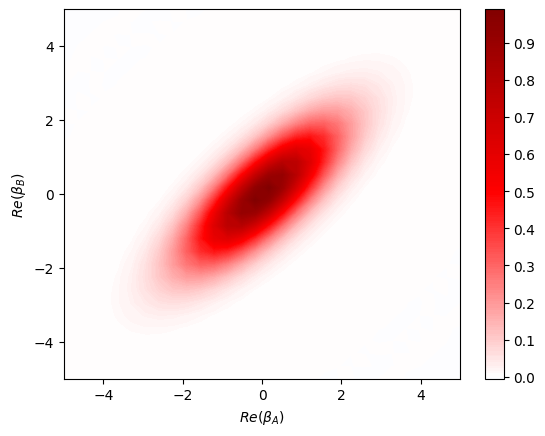

In [7]:
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, Z, 200, cmap = 'seismic', norm = plt.Normalize(vmin = -1, vmax = 1))
plt.colorbar();      
plt.ylabel(r'$Re(\beta_B)$')
plt.xlabel(r'$Re(\beta_A)$')
plt.show()

In [8]:
Z = []
dim = 30
cstate = final 
x = np.linspace(-5,5,30) #Imaginary part beta A 
y = np.linspace(-5,5,30) #Imaginary part beta B 
ticker = 0 

for betaB in y:
    Z.append([])
    for betaA in x: 
        result = (tensor(displace(dim, betaA*1j), displace(dim,betaB*1j)) * cstate * cstate.dag()).tr()
        Z[ticker].append(result)
    ticker += 1

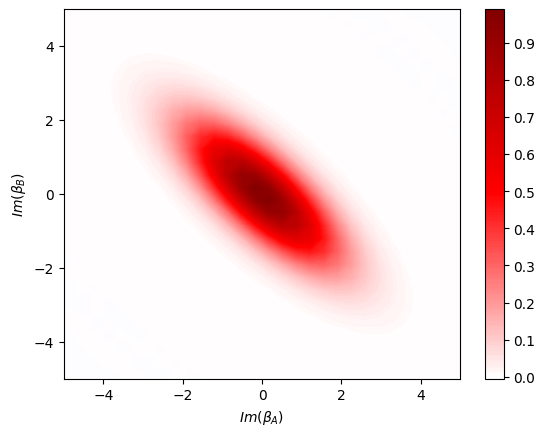

In [9]:
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, Z, 200, cmap = 'seismic', norm = plt.Normalize(vmin = -1, vmax = 1))
plt.colorbar();      
plt.ylabel(r'$Im(\beta_B)$')
plt.xlabel(r'$Im(\beta_A)$')
plt.show()

what if we take partial trace and visualise wigner

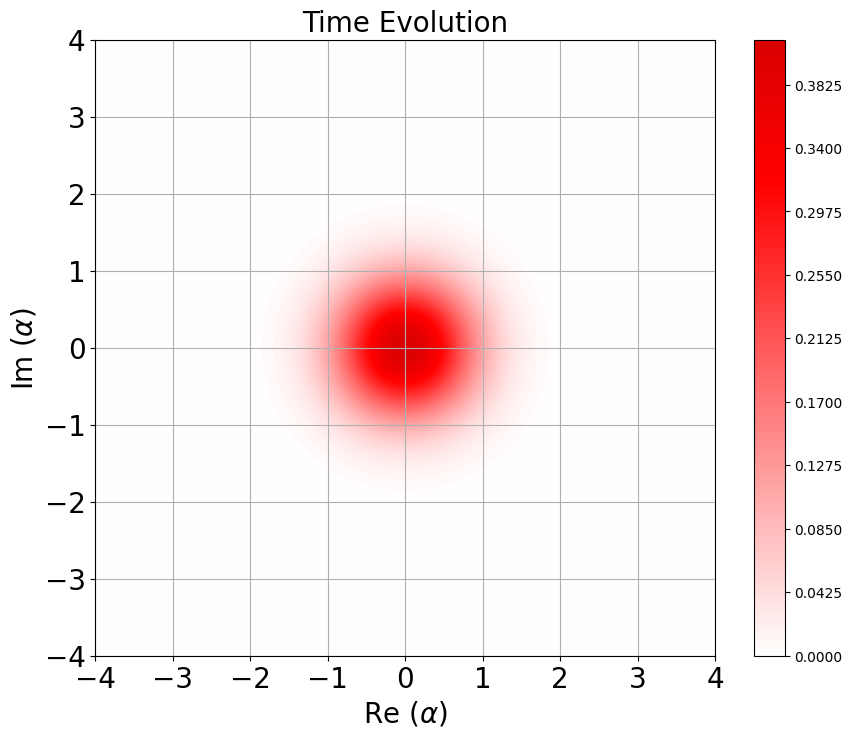

In [10]:
dm = final * final.dag()
pdm = dm.ptrace(0)
plot_wigner(pdm, 4)

# Protocol for creation of 1 Mode squeezed state using ECD


In [674]:
ground = Qobj([[1],[0]])
excited = Qobj([[0],[1]])
dim = 100
I = qeye(dim) 
vacuum = coherent(dim , 0)
def ECD(state, beta):
    U =tensor(displace(dim, beta/2), ground * excited.dag()) + tensor(displace(dim, -beta/2), excited * ground.dag())
    psi = U*state 
    norm = psi.norm()
    return psi *1/norm

def ECDp(state, beta):
    U =tensor(displace(dim, beta/2), ground * excited.dag()) - tensor(displace(dim, -beta/2), excited * ground.dag())
    psi = U*state 
    norm = psi.norm()
    return psi *1/norm

In [675]:
from qutip.qip.operations import rx, ry
#Ry = tensor(I, 1/np.sqrt(2)*Qobj([[1, -1], [1, 1]]))
#Rx = tensor(I, 1/np.sqrt(2) * Qobj([[+1, -1j], [-1j, +1]]))

In [676]:
Ry = tensor(I,ry(-np.pi/2))
Rx = tensor(I, rx(np.pi/2))
Rxm = tensor(I, rx(-np.pi/2))

In [677]:
ry(-np.pi/2)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]

In [691]:
def squeeze(ulist, vlist, state):
    ##### iteration 1
    dms = []
    for i in range(3):
        
        #U
        u = ulist[i]
        state1 = Ry * state
        state2 = ECDp(state1, u)
        dms.append(state2 * state2.dag())
        state3 = Ry * state2 
    
        #V 
        v = vlist[i]
        state4 = Rx * state3
        state5 = ECD(state4,  -1j*v)
        dms.append(state5 * state5.dag())
        state = Rx * state5
        dms.append(state * state.dag())
        #state_gr = tensor(I, excited.dag())* state
        #dms.append(state_gr * state_gr.dag())
    return dms 
        
    

In [694]:
ulist = [1.39, -0.2, -0.32]
vlist = [0.51, -0.46, -0.65]
ulist2 = [-0.48, -1.85, 0.56]
vlist2 = [0.51, -0.31, 0.91]
ulist3 = [1.6, -0.48, -1.11 ]
vlist3 = [0.39, -1.04, 0.32]
ulist4 = [1.85, -0.55, 1]
vlist4 =[0.42, -1.1, -0.33]
state = tensor(vacuum, ground)
dm = squeeze(ulist2, vlist2, state)
#final_dm = tensor(I, ground.dag())* dm[8] * tensor(I, ground)
len(dm)



9

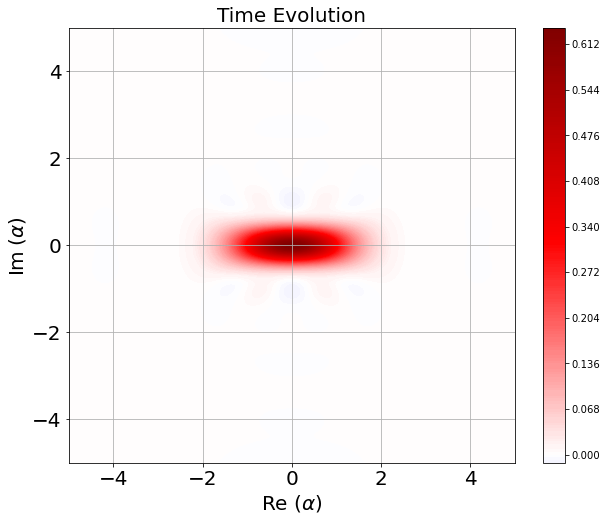

In [695]:
plot_wigner(dm[8].ptrace(0), 5)

In [416]:
(-1+1j)*(-1-1j)

(2+0j)

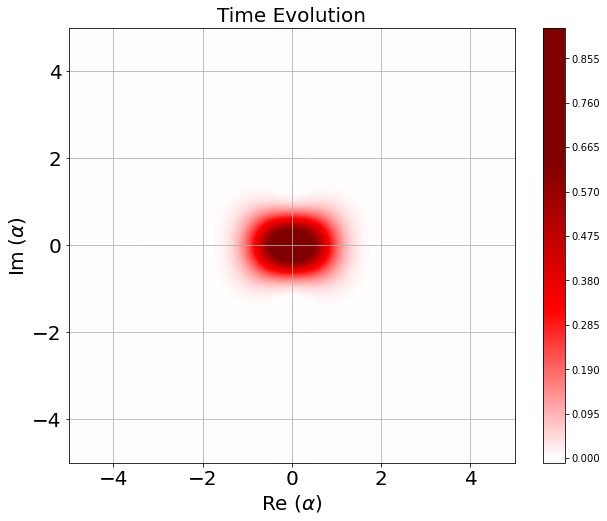

In [452]:
alpha = 0.5 - 1j * 0.3
beta = 0.5 + 1j*0.3
state = 1/4*((1+1j)*(displace(dim, alpha)+displace(dim, -alpha)) + (1+1j)*(displace(dim,beta)+displace(dim,-beta)))*vacuum
plot_wigner(state, 5)

In [9]:
from qutip import *
import numpy as np
state = (np.sqrt(2)*fock(2, 0) + np.sqrt(2)*fock(2, 1)).unit()
state.unit()


Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]]

# Protocol for creation of 2 Mode squeezed state using ECD

In [11]:
ground = Qobj([[1],[0]])
excited = Qobj([[0],[1]])
dim = 25
I = qeye(dim) 
vacuum = coherent(dim , 0)
def ECD2(state, beta1, beta2):
    U =tensor(displace(dim, -beta1/2),displace(dim, -beta2/2), ground * excited.dag()) + tensor(displace(dim, beta1/2),displace(dim, beta2/2), excited * ground.dag())
    psi = U*state 
    norm = psi.norm()
    return psi *1/norm

def ECD2p(state, beta1, beta2):
    U =tensor(displace(dim, -beta1/2),displace(dim, -beta2/2), ground * excited.dag()) - tensor(displace(dim, beta1/2),displace(dim, beta2/2), excited * ground.dag())
    psi = U*state 
    norm = psi.norm()
    return psi *1/norm

In [12]:
Ry2 = tensor(I,I,ry(-np.pi/2))
Rx2 = tensor(I,I,rx(np.pi/2))
Rxm2 = tensor(I,I,rx(-np.pi/2))

C:\Users\jonat\AppData\Local\Temp\ipykernel_19732\16741069.py:1: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  Ry2 = tensor(I,I,ry(-np.pi/2))
C:\Users\jonat\AppData\Local\Temp\ipykernel_19732\16741069.py:2: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  Rx2 = tensor(I,I,rx(np.pi/2))
C:\Users\jonat\AppData\Local\Temp\ipykernel_19732\16741069.py:3: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit impor

In [13]:
def squeeze2(ulist, vlist, state):
    ##### iteration 1
    dms = []
    for i in range(3):
        
        #U
        u1 = ulist[i][0]
        u2 = ulist[i][1]
        print(u1, u2)
        state1 = Ry2 * state
        state2 = ECD2p(state1, u1, u2)
        dms.append(state2 * state2.dag())
        state3 = Ry2 * state2 
    
        #V 
        v1 = vlist[i][0]
        v2 = vlist[i][1]
        state4 = Rx2 * state3
        state5 = ECD2(state4, -1j* v1, -1j*v2)
        dms.append(state5 * state5.dag())
        state = Rx2 * state5
        dms.append(state * state.dag())
        #state_gr = tensor(I, excited.dag())* state
        #dms.append(state_gr * state_gr.dag())
    return dms 
        

In [20]:
ulist = [1.39, -0.2, -0.32]
vlist = [0.51, -0.46, -0.65]
ulist2 = [-0.48, -1.85, 0.56]
vlist2 = [0.51, -0.31, 0.91]
ulist3 = [1.6, -0.48, -1.11 ]
vlist3 = [0.39, -1.04, 0.32]
ulist4 = [ 0.44143366, 0.44357013, 0.6540687,0.69738029]
vlist4 = [-0.29655732, -0.34020276 ,0.18936826, -0.64278849]
ulist5 = [[-0.38179614, -0.39204036], [-0.60567865, -0.74599658], [1.19633582, 1.28485291]]
vlist5 = [[ 0.24313828,  0.35815232], [0.19229832, 0.12837701], [ 0.58254815, -1.01745127]]
#### 2 step parameters without penalizing squeezing 1 mode parameters [ 0.44143366  0.44357013 -0.29655732 -0.34020276  0.6540687   0.69738029
#  0.18936826 -0.64278849]

### 2 step parameters with 1x penalty 


### 2 step paramteres with 10x penalty



#### 3 step parameters without penalizing squeezing 1 mode parameters[-0.38179614 -0.39204036  0.24313828  0.35815232 -0.60567865 -0.74599658
 # 0.19229832  0.12837701  1.19633582  1.28485291  0.58254815 -1.01745127] -> 0.07046717618325152
state = tensor(vacuum, vacuum, ground)
dm = squeeze2(ulist5, vlist5, state)

-0.38179614 -0.39204036
-0.60567865 -0.74599658
1.19633582 1.28485291


In [15]:
len(dm)

9

2 step result 

In [735]:
Z = []
x = np.linspace(-5,5,30) #Real part beta A 
y = np.linspace(-5,5,30) #Real part beta B 
ticker = 0
#psi0 = tensor(cstate, qstate)
cstate = tensor(I,I, ground.dag())*dm[5]*tensor(I,I, ground)

for betaB in y:
    Z.append([])
    for betaA in x: 
        result = (tensor(displace(dim, betaA), displace(dim,betaB)) * cstate * cstate.dag()).tr()
        #defintion of characteristic function
        Z[ticker].append(result.real)
    ticker += 1
    print(ticker)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


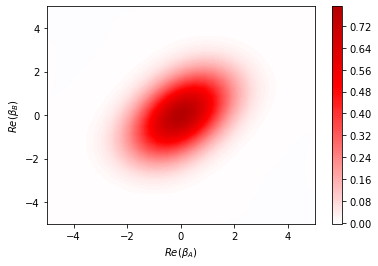

In [736]:
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, Z, 200, cmap = 'seismic', norm = plt.Normalize(vmin = -1, vmax = 1))
plt.colorbar();      
plt.ylabel(r'$Re(\beta_B)$')
plt.xlabel(r'$Re(\beta_A)$')
plt.show()

In [737]:

Z2 = []
x = np.linspace(-5,5,30) #Imaginary part beta A 
y = np.linspace(-5,5,30) #Imaginary part beta B 
ticker = 0 

for betaB in y:
    Z2.append([])
    for betaA in x: 
        result = (tensor(displace(dim, betaA*1j), displace(dim,betaB*1j)) * cstate * cstate.dag()).tr()
        Z2[ticker].append(result)
    ticker += 1          
    

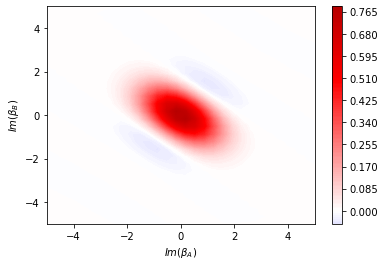

In [738]:
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, Z2, 200, cmap = 'seismic', norm = plt.Normalize(vmin = -1, vmax = 1))
plt.colorbar();      
plt.ylabel(r'$Im(\beta_B)$')
plt.xlabel(r'$Im(\beta_A)$')
plt.show()

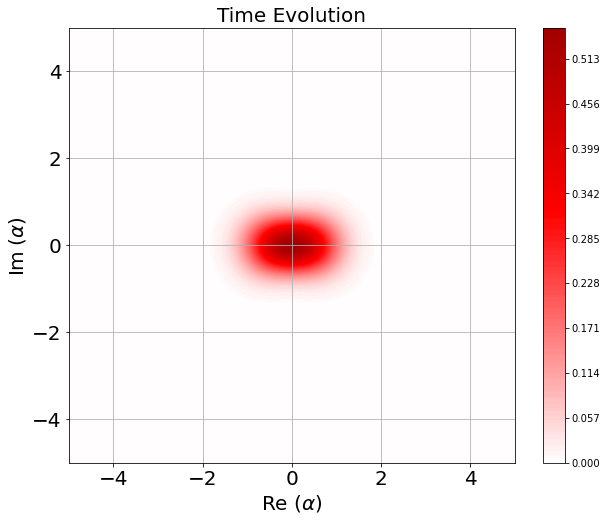

In [769]:
plot_wigner(dm[5].ptrace(0), 5)

3 step result 

In [27]:
dm[8]

Quantum object: dims = [[25, 25, 2], [25, 25, 2]], shape = (1250, 1250), type = oper, isherm = True
Qobj data =
[[0.62918405 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]

In [32]:
ptrace(dm[8], [0,1])

Quantum object: dims = [[25, 25], [25, 25]], shape = (625, 625), type = oper, isherm = True
Qobj data =
[[0.62918405 0.         0.06236    ... 0.         0.         0.        ]
 [0.         0.05206233 0.         ... 0.         0.         0.        ]
 [0.06236    0.         0.00618066 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]

In [33]:
## without poststelection on g
Z = []
x = np.linspace(-5,5,30) #Real part beta A 
y = np.linspace(-5,5,30) #Real part beta B 
ticker = 0
#psi0 = tensor(cstate, qstate)
cstate = ptrace(dm[8], [0,1])
for betaB in y:
    Z.append([])
    for betaA in x: 
        result = (tensor(displace(dim, betaA), displace(dim,betaB)) * cstate * cstate.dag()).tr()
        #defintion of characteristic function
        Z[ticker].append(result.real)
    ticker += 1
    print(ticker)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


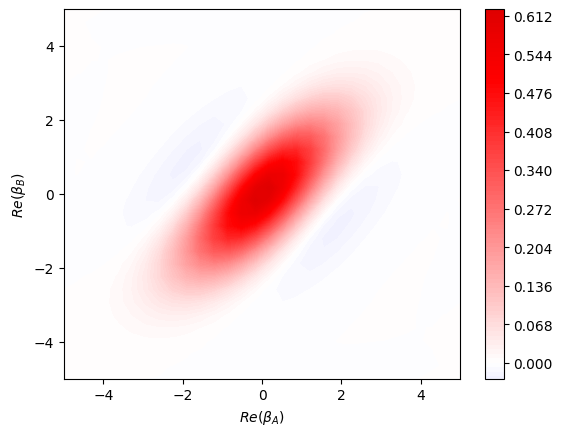

In [34]:
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, Z, 200, cmap = 'seismic', norm = plt.Normalize(vmin = -1, vmax = 1))
plt.colorbar();      
plt.ylabel(r'$Re(\beta_B)$')
plt.xlabel(r'$Re(\beta_A)$')
plt.show()

In [35]:
Z = []
x = np.linspace(-5,5,30) #Real part beta A 
y = np.linspace(-5,5,30) #Real part beta B 
ticker = 0
#psi0 = tensor(cstate, qstate)
cstate = tensor(I,I, ground.dag())*dm[8]*tensor(I,I, ground)

for betaB in y:
    Z.append([])
    for betaA in x: 
        result = (tensor(displace(dim, betaA), displace(dim,betaB)) * cstate * cstate.dag()).tr()
        #defintion of characteristic function
        Z[ticker].append(result.real)
    ticker += 1
    print(ticker)



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [36]:
three_step_no_penalty = cstate

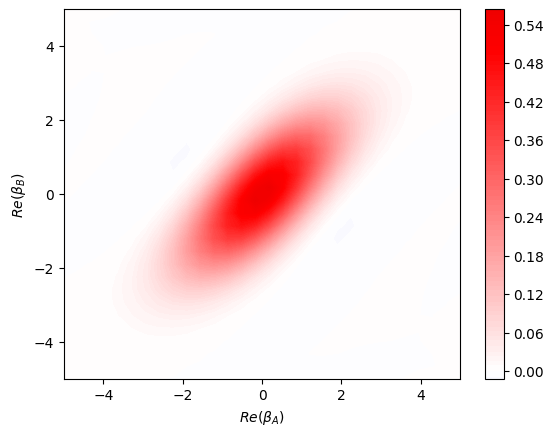

In [37]:
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, Z, 200, cmap = 'seismic', norm = plt.Normalize(vmin = -1, vmax = 1))
plt.colorbar();      
plt.ylabel(r'$Re(\beta_B)$')
plt.xlabel(r'$Re(\beta_A)$')
plt.show()

In [19]:

Z2 = []
x = np.linspace(-5,5,30) #Imaginary part beta A 
y = np.linspace(-5,5,30) #Imaginary part beta B 
ticker = 0 

for betaB in y:
    Z2.append([])
    for betaA in x: 
        result = (tensor(displace(dim, betaA*1j), displace(dim,betaB*1j)) * cstate * cstate.dag()).tr()
        Z2[ticker].append(result)
    ticker += 1    

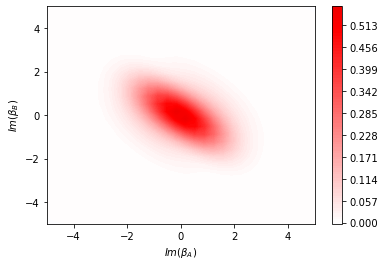

In [764]:
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, Z2, 200, cmap = 'seismic', norm = plt.Normalize(vmin = -1, vmax = 1))
plt.colorbar();      
plt.ylabel(r'$Im(\beta_B)$')
plt.xlabel(r'$Im(\beta_A)$')
plt.show()

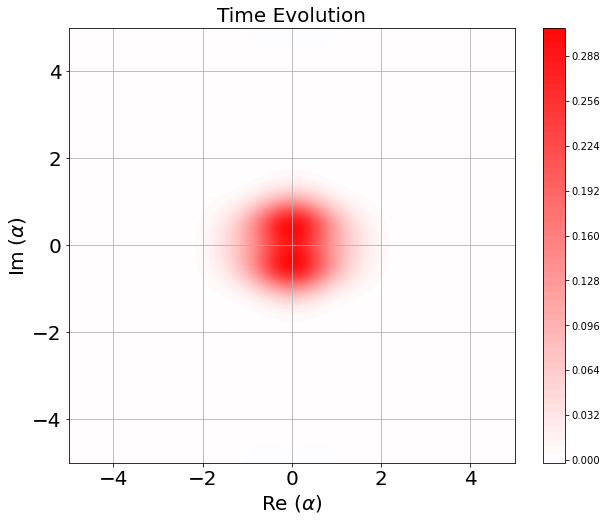

In [772]:
plot_wigner(dm[8].ptrace(0), 5)

2 step with penalty results (penalty = 1)

# Parameter Optimization Process

In [721]:
for i in range(0,3,2):
    print(i)

0
2
